In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [127]:
# Load data
df = pd.read_csv("clean_data/cleaned_data_for_pca.csv")
# Remove time (keep only date)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].dt.tz_localize(None)
df['timestamp'] = df['timestamp'].dt.date


In [43]:
# Drop columns: open, high, low, close, volume, marketCap, circulatingSupply
df = df.drop(df.columns[1:8], axis = 1)
df.head()

,timestamp,percent_change_24h,percent_change_7d,percent_change_30d,volume_percent_change_24h,volume_percent_change_7d,volume_percent_change_30d,market_cap_percent_change_24h,market_cap_percent_change_7d,market_cap_percent_change_30d,...,realized_daily_volatility,peg_error,abs_peg_error,price_deviation_5d,price_deviation_30d,downward_price_deviation_5d,downward_price_deviation_30d,value,value_classification,fed_funds_rate
0,2022-01-27,-0.383843,-0.770964,-0.574027,80.926274,337.911988,530.354555,-0.000846,-0.030067,-0.108702,...,0.007869,-0.003514,0.003514,0.001598,0.001794,0.001572,0.001355,20,Extreme Fear,0.08
1,2022-01-28,-0.134154,-0.457796,-0.626531,208.043003,277.795437,1619.070786,-0.000195,-0.026060,-0.106611,...,0.008439,-0.004851,0.004851,0.002695,0.001984,0.002679,0.001619,24,Extreme Fear,0.08
2,2022-01-29,0.527108,0.227126,-0.158662,-73.108369,-11.967560,558.575201,-0.004606,-0.025761,-0.107427,...,0.002971,0.000395,0.000395,0.002694,0.001952,0.002679,0.001619,24,Extreme Fear,0.08
3,2022-01-30,-0.060697,-0.025268,-0.165009,-58.978769,-12.339415,120.223668,0.000130,-0.015048,-0.105380,...,0.005119,-0.000213,0.000213,0.002690,0.001934,0.002680,0.001619,29,Fear,0.08
4,2022-01-31,-0.175691,-0.239455,-0.272398,11.443363,-52.647649,162.998405,0.001352,-0.006924,-0.104382,...,0.004293,-0.001969,0.001969,0.002827,0.001963,0.002821,0.001659,20,Extreme Fear,0.08


In [92]:
event_date = pd.Timestamp("2022-05-09")
pre_event_start = pd.Timestamp("2022-05-02")
pre_event_end = pd.Timestamp("2022-05-08")

# Get data from start up till before event
df['timestamp'] = pd.to_datetime(df['timestamp'])
data_before_event = df[df['timestamp'] <= pre_event_end].copy()
data_before_event.head()

,timestamp,percent_change_24h,percent_change_7d,percent_change_30d,volume_percent_change_24h,volume_percent_change_7d,volume_percent_change_30d,market_cap_percent_change_24h,market_cap_percent_change_7d,market_cap_percent_change_30d,...,realized_daily_volatility,peg_error,abs_peg_error,price_deviation_5d,price_deviation_30d,downward_price_deviation_5d,downward_price_deviation_30d,value,value_classification,fed_funds_rate
0,2022-01-27,-0.383843,-0.770964,-0.574027,80.926274,337.911988,530.354555,-0.000846,-0.030067,-0.108702,...,0.007869,-0.003514,0.003514,0.001598,0.001794,0.001572,0.001355,20,Extreme Fear,0.08
1,2022-01-28,-0.134154,-0.457796,-0.626531,208.043003,277.795437,1619.070786,-0.000195,-0.026060,-0.106611,...,0.008439,-0.004851,0.004851,0.002695,0.001984,0.002679,0.001619,24,Extreme Fear,0.08
2,2022-01-29,0.527108,0.227126,-0.158662,-73.108369,-11.967560,558.575201,-0.004606,-0.025761,-0.107427,...,0.002971,0.000395,0.000395,0.002694,0.001952,0.002679,0.001619,24,Extreme Fear,0.08
3,2022-01-30,-0.060697,-0.025268,-0.165009,-58.978769,-12.339415,120.223668,0.000130,-0.015048,-0.105380,...,0.005119,-0.000213,0.000213,0.002690,0.001934,0.002680,0.001619,29,Fear,0.08
4,2022-01-31,-0.175691,-0.239455,-0.272398,11.443363,-52.647649,162.998405,0.001352,-0.006924,-0.104382,...,0.004293,-0.001969,0.001969,0.002827,0.001963,0.002821,0.001659,20,Extreme Fear,0.08


In [93]:
# Select numeric columns only
numeric_cols = data_before_event.select_dtypes(include='number').columns
X_numeric = data_before_event[numeric_cols]

# Scale data for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

In [ ]:
# Run PCA
pca = PCA()
pca.fit(X_scaled)

# Variance explained per PC (in %)
explained_variance_percent = pca.explained_variance_ratio_ * 100

Explained variance percent per PC: [3.31344864e+01 1.67734237e+01 1.45777516e+01 7.22177420e+00
 6.12548341e+00 4.99380775e+00 3.98673545e+00 3.06479056e+00
 2.87248278e+00 1.59850263e+00 1.31092587e+00 1.28883973e+00
 1.16259019e+00 7.15915168e-01 5.28467212e-01 3.46501550e-01
 1.98617282e-01 9.89040131e-02 4.48555967e-07 5.41983322e-08
 1.63601318e-08]


In [66]:
# Determine k (number of PCs explaining >= 80% of variance)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
k = np.argmax(cumulative_variance >= 0.80) + 1
print("Number of PCs explaining ≥80% variance:", k)
print("Cumulative variance explained by first k PCs:", cumulative_variance[k-1])

Number of PCs explaining ≥80% variance: 6
Cumulative variance explained by first k PCs: 0.8282672704950756


,PC,Cumulative_Variance,Variance_Difference
0,1,0.331345,0.331345
1,2,0.499079,0.167734
2,3,0.644857,0.145778
3,4,0.717074,0.072218
4,5,0.778329,0.061255
5,6,0.828267,0.049938
6,7,0.868135,0.039867
7,8,0.898783,0.030648
8,9,0.927507,0.028725
9,10,0.943492,0.015985


# PCA with rolling window

In [54]:
k = 10  # For visualization purposes, we can also choose k=10
min_window = 30
pc_scores_list = []

for i in range(min_window-1, len(X_numeric)):

    # Rolling window for past 30 days only
    window_data = X_numeric.iloc[i-min_window+1:i+1]

    # Standardize window data
    scaler_window = StandardScaler()
    X_scaled_window = scaler_window.fit_transform(window_data)

    # Fit PCA with fixed k PCs
    pca_window = PCA(n_components=k)
    pca_window.fit(X_scaled_window)

    # Get PC scores for LAST day in window (day t)
    last_day_score = pca_window.transform(X_scaled_window)[-1]

    pc_scores_list.append(last_day_score)

# Convert to dataframe
timestamps_pre_event = data_before_event['timestamp']

pc_scores_df = pd.DataFrame(
    pc_scores_list,
    columns=[f'PC{i+1}' for i in range(k)]
)

pc_scores_df['timestamp'] = timestamps_pre_event.iloc[min_window-1:].values


/Users/judy/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/judy/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/judy/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
/Users/judy/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/judy/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/judy/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base

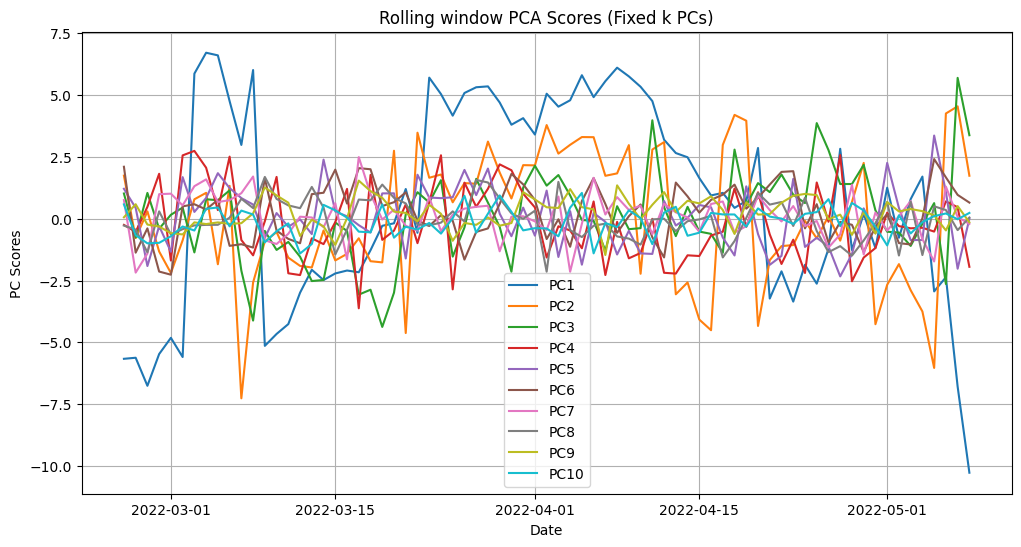

In [ ]:
# Plot PC scores over time
plt.figure(figsize=(12,6))
for i in range(k):
    plt.plot(pc_scores_df['timestamp'], pc_scores_df[f'PC{i+1}'], label=f'PC{i+1}')
plt.xlabel('Date')
plt.ylabel('PC Scores')
plt.title('Rolling window PCA Scores (Fixed k PCs)')
plt.legend()
plt.grid(True)
plt.show()

# k=10, 95%

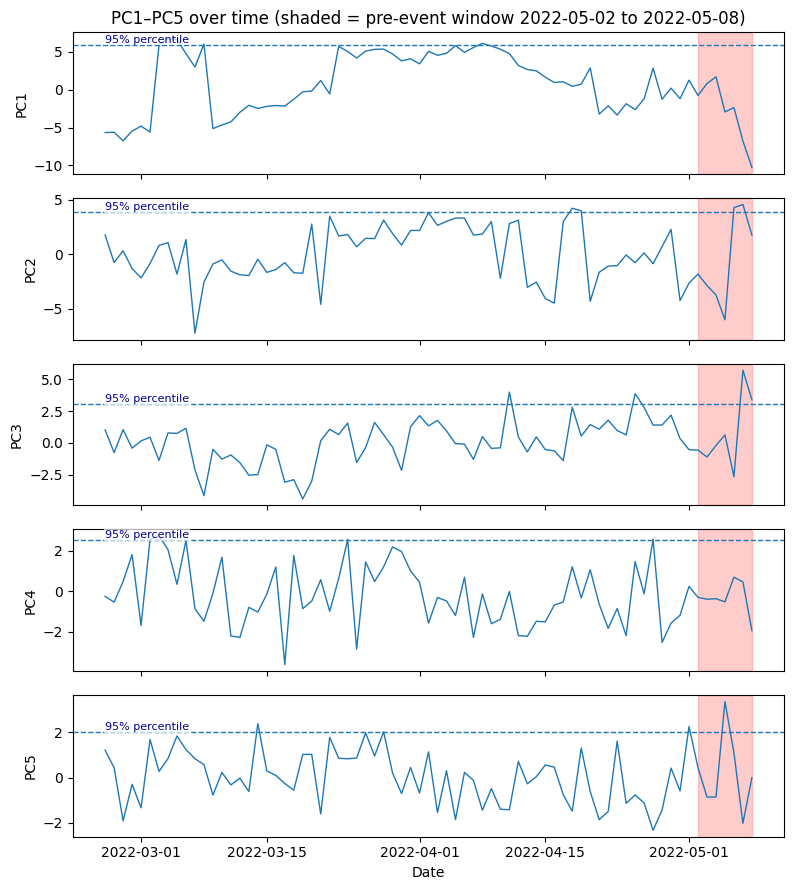

In [ ]:
# 95th percentile line (per PC)
p95 = pc_scores_df.quantile(0.95)

pc_cols = [f"PC{i}" for i in range(1, 6)]

# Plot PC1-PC5 with shaded pre-event window
fig, axes = plt.subplots(5, 1, figsize=(8, 9), sharex=True)

for i, col in enumerate(pc_cols):
    ax = axes[i]
    ax.plot(pc_scores_df['timestamp'], pc_scores_df[col], linewidth=1)
    ax.axvspan(pre_event_start, pre_event_end, alpha=0.2, color = 'red') 
    ax.axhline(p95[col], linestyle="--", linewidth=1, label='95th percentile') # 95% line
    ax.text(
        pc_scores_df['timestamp'].iloc[0], 
        p95[col],                 
        "95% percentile",
        va='bottom', ha='left',
        fontsize=8, color='darkblue',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=0.5)
    )
    ax.set_ylabel(col)
    # ax.axhline(0, linewidth=0.8, linestyle="--")
    ax.set_ylabel(col)

axes[0].set_title("PC1–PC5 over time (shaded = pre-event window 2022-05-02 to 2022-05-08)")
axes[-1].set_xlabel("Date")
plt.tight_layout()
plt.show()

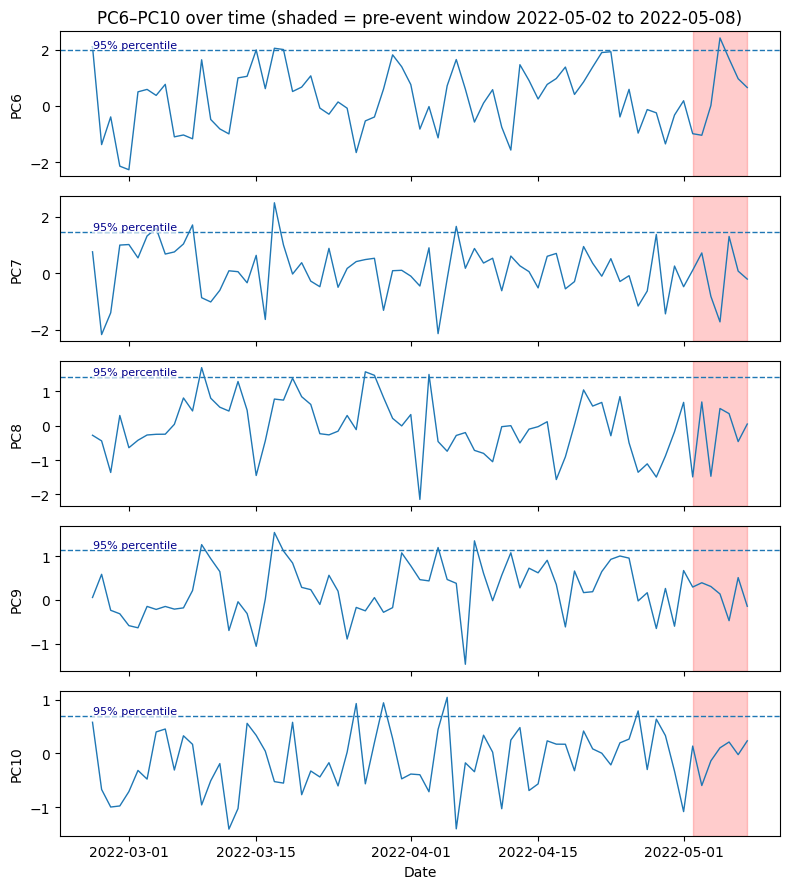

In [ ]:
# 95th percentile line (per PC)
p95 = pc_scores_df.quantile(0.95)

pc_cols = [f"PC{i}" for i in range(6, 11)]
# Plot PC6-PC10 with shaded pre-event window
fig, axes = plt.subplots(5, 1, figsize=(8, 9), sharex=True)

for i, col in enumerate(pc_cols):
    ax = axes[i]
    ax.plot(pc_scores_df['timestamp'], pc_scores_df[col], linewidth=1)
    ax.axvspan(pre_event_start, pre_event_end, alpha=0.2, color = 'red')  
    ax.axhline(p95[col], linestyle="--", linewidth=1, label='95th percentile') # 95% line
    ax.text(
        pc_scores_df['timestamp'].iloc[0], 
        p95[col],                          
        "95% percentile",
        va='bottom', ha='left',
        fontsize=8, color='darkblue',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=0.5)
    )
    ax.set_ylabel(col)
    # ax.axhline(0, linewidth=0.8, linestyle="--")
    ax.set_ylabel(col)

axes[0].set_title("PC6–PC10 over time (shaded = pre-event window 2022-05-02 to 2022-05-08)")
axes[-1].set_xlabel("Date")
plt.tight_layout()
plt.show()

# Symmetric z-score bands

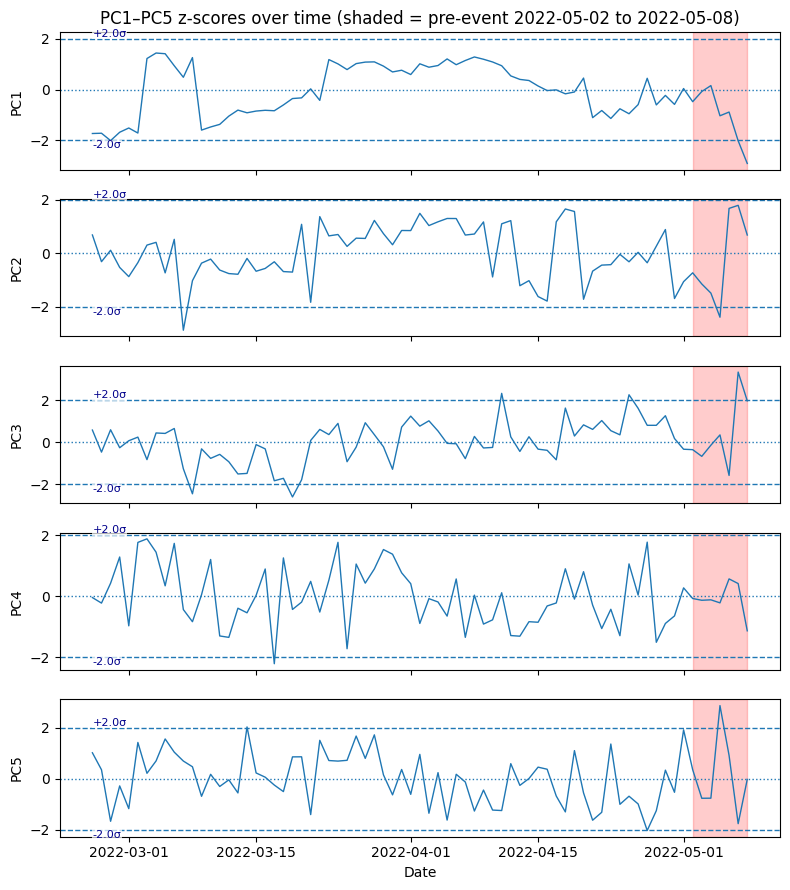

In [144]:
pc_cols = [f"PC{i}" for i in range(1, 6)]
m = 2.0  # symmetric band level: ±m


# Fixed baseline: use "normal" period before pre-event
baseline_end = pre_event_start - pd.Timedelta(days=1)
baseline_mask = pc_scores_df["timestamp"] <= baseline_end

# Compute z-scores per PC using fixed baseline mean/std
z_df = pc_scores_df[["timestamp"]].copy()
for col in pc_cols:
    base = pc_scores_df.loc[baseline_mask, col].dropna()
    mu = base.mean()
    sd = base.std(ddof=1)
    z_df[col] = (pc_scores_df[col] - mu) / sd


fig, axes = plt.subplots(5, 1, figsize=(8, 9), sharex=True)

for i, col in enumerate(pc_cols):
    ax = axes[i]
    ax.plot(z_df["timestamp"], z_df[col], linewidth=1)

    ax.axvspan(pre_event_start, pre_event_end, alpha=0.2, color="red")

    # symmetric bands
    ax.axhline(+m, linestyle="--", linewidth=1)
    ax.axhline(-m, linestyle="--", linewidth=1)
    ax.axhline(0, linestyle=":", linewidth=1)

    x0 = z_df["timestamp"].iloc[0]
    ax.text(x0, +m, f"+{m}σ", va="bottom", ha="left",
            fontsize=8, color="darkblue",
            bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, pad=0.5))
    ax.text(x0, -m, f"-{m}σ", va="top", ha="left",
            fontsize=8, color="darkblue",
            bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, pad=0.5))

    ax.set_ylabel(col)

axes[0].set_title(f"PC1–PC5 z-scores over time (shaded = pre-event {pre_event_start.date()} to {pre_event_end.date()})")
axes[-1].set_xlabel("Date")
plt.tight_layout()
plt.show()

In [145]:
import pandas as pd
import numpy as np

event_date = pd.to_datetime("2022-05-09")

def hit_summary(z_df, col, m, start=None, end=None, event_date=None):
    tmp = z_df[["timestamp", col]].dropna().copy()
    tmp["timestamp"] = pd.to_datetime(tmp["timestamp"])

    if start is not None:
        tmp = tmp[tmp["timestamp"] >= pd.to_datetime(start)]
    if end is not None:
        tmp = tmp[tmp["timestamp"] <= pd.to_datetime(end)]

    hits = tmp[col].abs() >= m

    # first hit date
    first_hit_date = tmp.loc[hits, "timestamp"].min() if hits.any() else None

    # lead time calculation
    if event_date is not None and first_hit_date is not None:
        lead_time = (event_date - first_hit_date).days
    else:
        lead_time = np.nan

    return {
        "PC": col,
        "n_days": int(len(tmp)),
        "hit_days(|z|>=m)": int(hits.sum()),
        "hit_rate": float(hits.mean()) if len(tmp) else np.nan,
        "max_abs_z": float(tmp[col].abs().max()) if len(tmp) else np.nan,
        "first_hit_date": first_hit_date,
        "lead_time_days": lead_time
    }

# Pre-event window summary
summary_pre = [
    hit_summary(z_df, c, m, pre_event_start, pre_event_end, event_date)
    for c in pc_cols
]

# Full sample summary (lead time relative to event)
summary_all = [
    hit_summary(z_df, c, m, event_date=event_date)
    for c in pc_cols
]

print("Pre-event window summary:")
print(pd.DataFrame(summary_pre).sort_values("max_abs_z", ascending=False))

print("\nFull sample summary:")
print(pd.DataFrame(summary_all).sort_values("lead_time_days", ascending=False))

Pre-event window summary:
    PC  n_days  hit_days(|z|>=m)  hit_rate  max_abs_z first_hit_date  \
2  PC3       7                 1  0.142857   3.325699     2022-05-07   
0  PC1       7                 2  0.285714   2.901720     2022-05-07   
4  PC5       7                 1  0.142857   2.861404     2022-05-05   
1  PC2       7                 1  0.142857   2.394099     2022-05-05   
3  PC4       7                 0  0.000000   1.138029            NaT   

   lead_time_days  
2             2.0  
0             2.0  
4             4.0  
1             4.0  
3             NaN  

Full sample summary:
    PC  n_days  hit_days(|z|>=m)  hit_rate  max_abs_z first_hit_date  \
0  PC1      73                 3  0.041096   2.901720     2022-02-27   
1  PC2      73                 2  0.027397   2.879975     2022-03-07   
2  PC3      73                 5  0.068493   3.325699     2022-03-08   
4  PC5      73                 3  0.041096   2.861404     2022-03-14   
3  PC4      73                 1  0.013

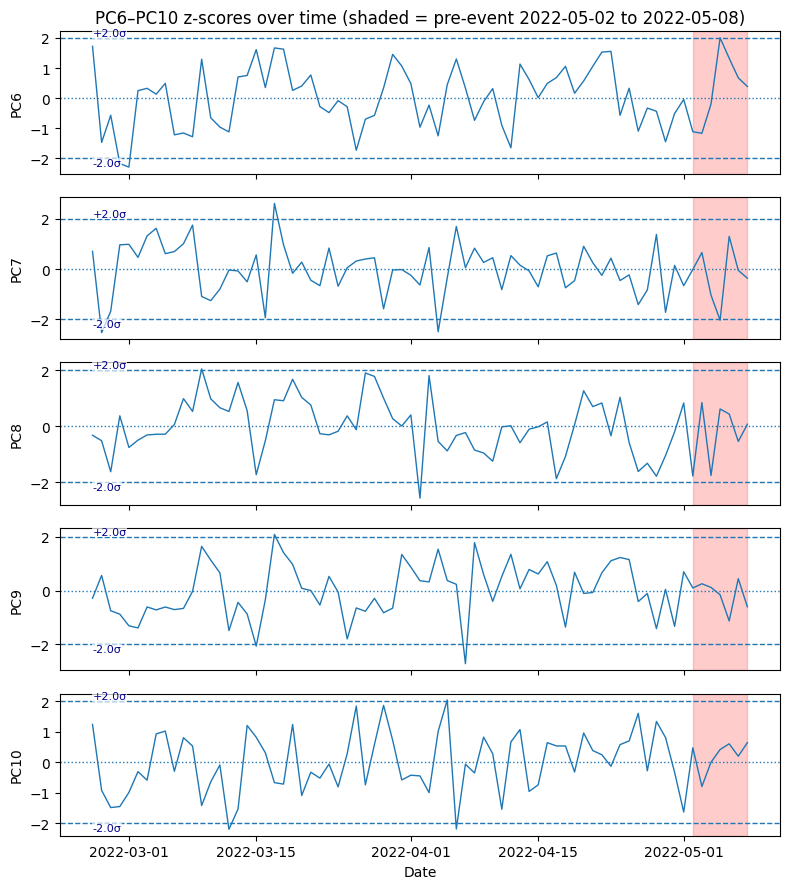

In [ ]:
pc_cols = [f"PC{i}" for i in range(6, 11)]
m = 2.0  # symmetric band level: ±m


# Fixed baseline: use "normal" period before pre-event
baseline_end = pre_event_start - pd.Timedelta(days=1)
baseline_mask = pc_scores_df["timestamp"] <= baseline_end

# Compute z-scores per PC using fixed baseline mean/std
z_df = pc_scores_df[["timestamp"]].copy()
for col in pc_cols:
    base = pc_scores_df.loc[baseline_mask, col].dropna()
    mu = base.mean()
    sd = base.std(ddof=1)
    z_df[col] = (pc_scores_df[col] - mu) / sd

fig, axes = plt.subplots(5, 1, figsize=(8, 9), sharex=True)

for i, col in enumerate(pc_cols):
    ax = axes[i]
    ax.plot(z_df["timestamp"], z_df[col], linewidth=1)

    ax.axvspan(pre_event_start, pre_event_end, alpha=0.2, color="red")

    # symmetric bands
    ax.axhline(+m, linestyle="--", linewidth=1)
    ax.axhline(-m, linestyle="--", linewidth=1)
    ax.axhline(0, linestyle=":", linewidth=1)

    x0 = z_df["timestamp"].iloc[0]
    ax.text(x0, +m, f"+{m}σ", va="bottom", ha="left",
            fontsize=8, color="darkblue",
            bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, pad=0.5))
    ax.text(x0, -m, f"-{m}σ", va="top", ha="left",
            fontsize=8, color="darkblue",
            bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, pad=0.5))

    ax.set_ylabel(col)

axes[0].set_title(f"PC6–PC10 z-scores over time (shaded = pre-event {pre_event_start.date()} to {pre_event_end.date()})")
axes[-1].set_xlabel("Date")
plt.tight_layout()
plt.show()

In [119]:
summary_pre = [hit_summary(z_df, c, m, pre_event_start, pre_event_end) for c in pc_cols]
summary_all = [hit_summary(z_df, c, m) for c in pc_cols]

print("Pre-event window summary:")
print(pd.DataFrame(summary_pre).sort_values("max_abs_z", ascending=False))

print("\nFull sample summary:")
print(pd.DataFrame(summary_all).sort_values("max_abs_z", ascending=False))

Pre-event window summary:
     PC  n_days  hit_days(|z|>=m)  hit_rate  max_abs_z
1   PC7       7                 1  0.142857   2.031214
0   PC6       7                 1  0.142857   2.002095
2   PC8       7                 0  0.000000   1.782599
3   PC9       7                 0  0.000000   1.131710
4  PC10       7                 0  0.000000   0.791831

Full sample summary:
     PC  n_days  hit_days(|z|>=m)  hit_rate  max_abs_z
3   PC9      73                 3  0.041096   2.723456
1   PC7      73                 4  0.054795   2.608356
2   PC8      73                 2  0.027397   2.572052
0   PC6      73                 3  0.041096   2.286590
4  PC10      73                 3  0.041096   2.195441


# Biplot

In [122]:
from adjustText import adjust_text

def biplot(scores, loadings, feature_names, explained_variance, 
           pc_x=1, pc_y=2, scale_scores=1, scale_loadings=1):
    
    x_idx = pc_x - 1
    y_idx = pc_y - 1
    
    plt.figure(figsize=(10,8))
    
    # Plot scores
    plt.scatter(scores[:, x_idx] * scale_scores, 
                scores[:, y_idx] * scale_scores,
                alpha=0.5, color='steelblue', label='Observations')
    
    texts = []
    
    # Plot loadings
    for i, feature in enumerate(feature_names):
        x = loadings[i, x_idx] * scale_loadings
        y = loadings[i, y_idx] * scale_loadings
        
        plt.arrow(0, 0, x, y,
                  color='red', alpha=0.7, head_width=0.05)
        
        texts.append(
            plt.text(x, y, feature,
                     fontsize=9, color='black')
        )
    
    # Automatically adjust text positions
    adjust_text(texts, 
                arrowprops=dict(arrowstyle='-', color='grey', lw=0.5))
    
    plt.xlabel(f'PC{pc_x} ({explained_variance[x_idx]:.1f}% variance)')
    plt.ylabel(f'PC{pc_y} ({explained_variance[y_idx]:.1f}% variance)')
    plt.title(f'PCA Biplot: PC{pc_x} vs PC{pc_y}')
    plt.grid(True)
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
    plt.axvline(0, color='grey', linestyle='--', linewidth=0.7)
    plt.show()

/Users/judy/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/judy/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/judy/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


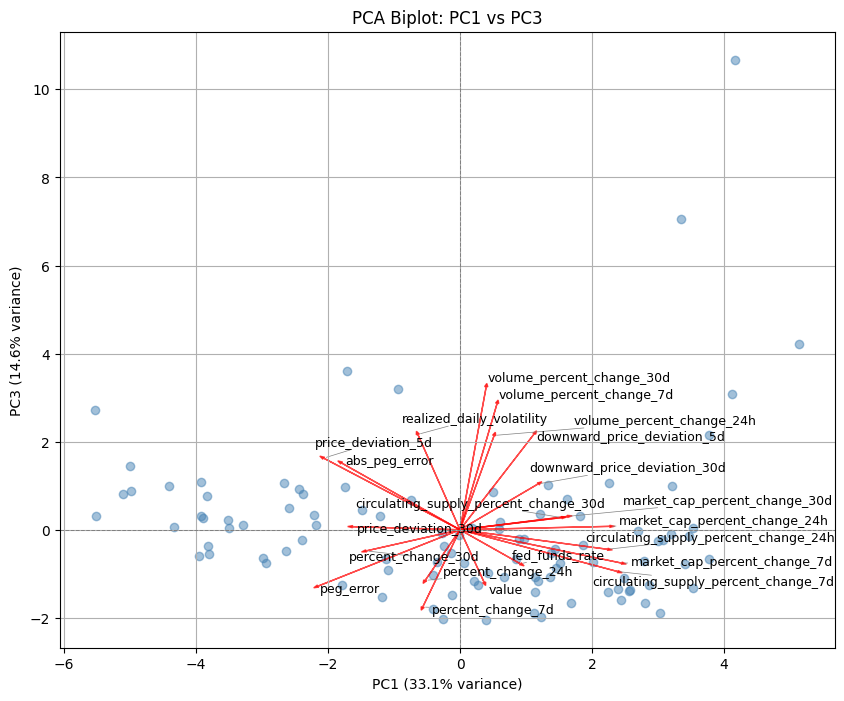

In [123]:
# PC1 vs PC3
numeric_cols_list = numeric_cols.tolist()
biplot(scores=pca.transform(X_scaled), 
       loadings=pca.components_.T, 
       feature_names=numeric_cols_list, 
       explained_variance=explained_variance_percent, 
       pc_x=1, pc_y=3, 
       scale_scores=1, scale_loadings=7)
